In [8]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.preprocessing.image import load_img, img_to_array
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy
import random
import cv2

In [9]:
img_width, img_height = 216, 384

In [10]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(    
    validation_split=0.05,
    horizontal_flip = True,
)

val = tf.keras.preprocessing.image.ImageDataGenerator(    
    validation_split=0.05,
)

In [11]:
class_names = ['pelna', 'w_czesci', 'pusta']

In [12]:
my_seed = 11123
training_directory = "../../dataset/butelka/butelki_orig_images"

train_generator = datagen.flow_from_directory(training_directory, (img_height, img_width), batch_size=32, class_mode='categorical', seed = my_seed, subset='training', classes=class_names, shuffle=True)
val_generator = val.flow_from_directory(training_directory, (img_height, img_width), batch_size=32, class_mode='categorical', seed = my_seed, subset='validation', classes=class_names, shuffle=True)

Found 5700 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [13]:
from collections import Counter

print("Training")
print(train_generator.class_indices)
print(Counter(train_generator.classes))
print("Validation")
print(val_generator.class_indices)
print(Counter(val_generator.classes))

num_classes = len(class_names)

Training
{'pelna': 0, 'w_czesci': 1, 'pusta': 2}
Counter({0: 1900, 1: 1900, 2: 1900})
Validation
{'pelna': 0, 'w_czesci': 1, 'pusta': 2}
Counter({0: 100, 1: 100, 2: 100})


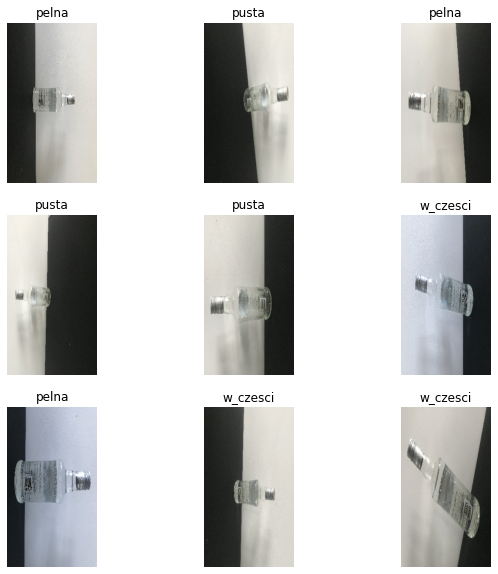

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for gen in range(3):
    x,y = train_generator.next()

    for i in range(3):
        ax = plt.subplot(3, 3, gen * 3 + i + 1)
        plt.imshow(x[i].astype("uint8"))
        plt.title(class_names[np.argmax(y[i])])
        plt.axis("off")

plt.show()

In [15]:
def create_model(num_classes):

    model = Sequential([
        Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
        MaxPooling2D(2, 2),

        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        
        Conv2D(64, (3, 3), activation='relu'),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),

        Conv2D(128, (3, 3), activation='relu'),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),

        Conv2D(256, (3, 3), activation='relu'),
        Conv2D(256, (3, 3), activation='relu'),
        Conv2D(256, (3, 3), activation='relu'),
        Conv2D(256, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),

        Flatten(),
        Dense(512, activation='relu'),
        #Dropout(0.5),
        Dense(512, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

    model.summary()

    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics =['accuracy'])
    
    return model

In [16]:
model = create_model(num_classes)

2021-12-13 20:05:55.544967: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-13 20:05:55.623808: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-13 20:05:55.624718: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 382, 214, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 191, 107, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 189, 105, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 94, 52, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 92, 50, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 90, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 45, 24, 64)        0

2021-12-13 20:05:55.629021: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-13 20:05:55.629870: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-13 20:05:55.630738: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-13 20:05:58.226022: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-13 20:05:58.226742: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read f

In [ ]:
epochs = 10

my_callbacks = [
    #tf.keras.callbacks.ModelCheckpoint(filepath='nasze.{epoch:02d}-{val_loss:.2f}.h5'),
]

history=model.fit(train_generator, epochs=epochs, callbacks=my_callbacks, validation_data=val_generator)

2021-12-13 20:06:05.086663: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2021-12-13 20:06:16.651512: I tensorflow/stream_executor/cuda/cuda_dnn.cc:381] Loaded cuDNN version 8204


 18/179 [==>...........................] - ETA: 26:42 - loss: 1.6416 - accuracy: 0.3056

In [ ]:

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.imshow(X[0])

In [ ]:
from PIL import Image

In [ ]:
def make_prediction(src, model, show_image):
    for root, subdirs, files in os.walk(src):
        for images in files:
            img = Image.open(root + images)
            img = img.resize((img_width, img_height))
            if(show_image):
                img.show()
            #img = np.array(img).astype('float32')
            #img = img / 255.0
            X_to_predict = np.expand_dims(img, axis=0)
            y_pred = model.predict(X_to_predict)[0]
            prediction_class = y_pred.argmax()
            prediction_confidence = y_pred[prediction_class]
            
            print(prediction_class)
            print(prediction_confidence)
            print(class_names[prediction_class])
            print(y_pred)
            

print(class_names)

In [ ]:
model.save('nowa2.h5')

In [ ]:
from keras.models import load_model

# Do odczytu

In [ ]:
model2 = load_model('trening_91.h5')

In [ ]:
make_prediction('dataset/testy_butelka/Puste/', model, True)